In [1]:
import numpy as np
from IPython.display import Image

## _고유 분해의 성질_

- N차원의 정방 행렬 A의 고유 분해는 다음과 같은 성질을 가진다.

In [10]:
# 1. N개의 고윳값-고유벡터를 가진다. (복소수인 경우와 중복인 경우를 포함)

In [2]:
a = np.empty((3, 3))
a

array([[-2.31584178e+077, -1.29073970e-231,  2.47032823e-323],
       [ 0.00000000e+000,  0.00000000e+000,  0.00000000e+000],
       [-2.31584178e+077, -2.32035390e+077,  9.88131292e-324]])

In [3]:
w3, v3 = np.linalg.eig(a)
len(w3), len(v3)

(3, 3)

In [4]:
def count(n):    
    A = np.empty((n, n))
    w, v = np.linalg.eig(A)
    print(len(w), len(v))

count(1000)

1000 1000


In [5]:
# 2. 대칭 행렬  A 는  N 개의 실수 고윳값을 가지며 고유 벡터들이 서로 수직(orthogonal)이다.

In [6]:
def make_symmetric(n):
    # make n dimensional symmetric matrix
    r = np.random.randint(-500, 500, size=(n, n))
    return (r + r.T)
make_symmetric(5)

array([[-340,  569,   23, -557,  137],
       [ 569, -280, -136,   24,   15],
       [  23, -136, -538, -106,  -35],
       [-557,   24, -106,  536,    3],
       [ 137,   15,  -35,    3, -460]])

In [7]:
def show_eigc(n):
    S = make_symmetric(n)
    w, v = np.linalg.eig(S)
    return len(w)

In [8]:
def show_ortho(X):
    w, v = np.linalg.eig(X)
    number = len(v)
    result = []
    
    for i in range(number):
        ls = []
        for j in range(number):
            ls.append(True if (np.dot(v[i], v[j])) or (i == j) == 0 else False)
        result.append(ls)

    return all(result)

In [9]:
# 10 by 10 symmetric matrix의 실수 고윳값 개수는?

show_eigc(10)

10

In [10]:
X = make_symmetric(10)
w, v = np.linalg.eig(X)
v[0]

array([-0.0425324 , -0.08227777, -0.64494179, -0.09786016,  0.05701782,
       -0.22199698, -0.65271623, -0.05517797, -0.28999262,  0.01350355])

In [11]:
# 10 by 10 symmetic matrix의 고유 벡터들은 서로 수직(orthogonal)할까?

X = make_symmetric(5)
show_ortho(X)

True

In [12]:
# 3. 대칭 행렬의 고윳값이 모두 양수이면 양의 정부호(positive-definite)이다. 역도 성립한다.

In [13]:
X = make_symmetric(2)
w, v = np.linalg.eig(X)
w

array([962.72711553, -88.72711553])

In [14]:
np.linalg.cholesky(X)

LinAlgError: Matrix is not positive definite

In [15]:
def is_positivedefinit(X):
    # check whether matrix A is positive definite or not.
    
    x = np.random.randint(-500, 500, len(X))
    w, v = np.linalg.eig(X)
    if np.dot(np.dot(x, X), x.T) > 0:
        print(w)
        print("X is positive")
    else:
        print("X is not positive definite")
        print(w)
is_positivedefinit(X)

[962.72711553 -88.72711553]
X is positive


In [16]:
# 4. 행렬  A 가  X^TX  형태의 공분산 행렬이면 0또는 양의 고윳값을 가진다.

In [17]:
def make_covar_matrix(n):
    X = np.random.randint(-500, 500, size=(n, n))
    return np.dot(X.T, X)

In [18]:
def is_eigvals_semipositive(X):
    w, v = np.linalg.eig(X)
    return all(w >= 0)

In [19]:
A = make_covar_matrix(5)
A, is_eigvals_semipositive(A)

(array([[ 360957,  174701,  110460,  -28454, -305816],
        [ 174701,  317872, -232550, -155931, -294376],
        [ 110460, -232550,  756535,  181989,  138063],
        [ -28454, -155931,  181989,  636765,   68348],
        [-305816, -294376,  138063,   68348,  600701]]), True)

In [20]:
# 5. 행렬의 대각합은 모든 고윳값의 합과 같다.

In [21]:
A = np.empty((4, 4))
A

array([[-2.31584178e+077, -2.31584178e+077,  4.94065646e-323,
         0.00000000e+000],
       [ 0.00000000e+000,  0.00000000e+000,  0.00000000e+000,
         0.00000000e+000],
       [ 0.00000000e+000,  0.00000000e+000,  0.00000000e+000,
         0.00000000e+000],
       [ 0.00000000e+000,  0.00000000e+000, -2.31584178e+077,
        -2.31584178e+077]])

In [22]:
print("대각합은 ", np.trace(A))
print("모든 고윳값의 합은 ", np.sum(np.linalg.eigvals(A)))

대각합은  -4.631683569492648e+77
모든 고윳값의 합은  -4.631683569492648e+77


In [23]:
# 6. 행렬의 행렬식은 모든 고윳값의 곱과 같다.

In [24]:
print("행렬식은 ", np.linalg.det(A))
print("모든 고윳값의 곱은 ", np.prod(np.linalg.eigvals(A)))

행렬식은  0.0
모든 고윳값의 곱은  0.0


## _고유분해 응용분야_

- 구글 페이지랭크(Page Rank) 알고리즘

- 출처 1 : 예제 [사이언스몰](http://www.scienceall.com/%EB%AF%B8%EB%9E%98%EB%A5%BC-%EC%97%AC%EB%8A%94-%EC%88%98%ED%95%99-%E2%91%A6-google-%EA%B2%80%EC%83%89%EC%9D%98-%EB%B9%84%EB%B0%80%EC%9D%80/)
- 출처 2 : 원리 [조성문 블로그](https://sungmooncho.com/2012/08/26/pagerank/)
- 출처 3 : eigenvalue를 PR 알고리즘에 쓰는 이유 [mathmatics](https://math.stackexchange.com/questions/936757/why-is-pagerank-an-eigenvector-problem?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa, target="_blank")

### 설명  `PR(A) = (1-d)/N + d (PR(T1)/C(T1) + … + PR(Tn)/C(Tn))`

- 수식 안 기호의 의미
    - PR은 PageRank의 줄임말
    - PR(A)는 ‘A’라는 웹페이지의 페이지 랭크를 의미한다. 
    - T1, T2, … Tn은 그 페이지를 가리키는 다른 페이지들을 의미한다. 그리고  PR(T1)는 당연히 T1이라는 페이지의 페이지 랭크값이다.
    - C(T1)는 T1이라는 페이지가 가지고 있는 링크의 총 갯수를 의미한다.

- 1.
    - d = 1이라고 가정하고 위 수식을 보면 어떤 페이지 A의 페이지 랭크는, 그 페이지를 인용하는 다른 페이지 T1, T2, T3.. 의 PR을 정규화한 값의 합‘이다. 
    - 페이지 A의 PR(A)는 A라는 페이지를 가리키는 다른 페이지의 PR이 높을수록 (즉, 더 중요할수록) 더 높아진다. 
    - ‘정규화한 값의 합‘인 이유는, PR의 단순 합산이 아니기 때문이다. 예를 들어, PR(T1)이 높아도, C(T1) - T1이 달아놓은 링크 수 - 가 높다면, T1이 기여하는 비중은 낮아지는 셈이다. 

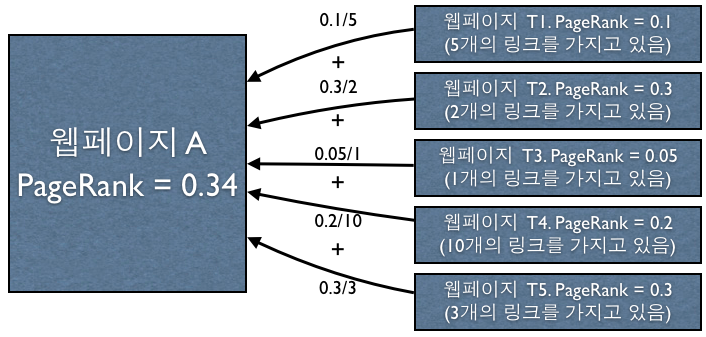

In [32]:
Image("sample.png")

- 2.
    - 위 그림에서 A를 가리키는 페이지는 T1, T2, T3, T4, T5의 다섯 개가 있고, 이들을 정규화해서 합한 값이 0.34이므로, PR(A) = 0.34이다.
    - PR(A)는 A가 가리키는 또 다른 페이지의 PageRank를 계산하는 데 쓰일 것이다. PR(T1) 또한, T1을 가리키는 다른 페이지들의 PageRank값으로부터 구한다. 
    - 이렇게 해서 파고 내려가면 무한히 가게 될 것 같은데, ‘제한 조건’을 걸면 언젠가는 계산이 끝이 난다. 
    - 이러한 방법으로 계산하는 것을 컴퓨터 과학에서는 ‘recursive(재귀적)‘이라고 한다. 즉, PageRank는 재귀 호출 알고리즘이다.
    - **재귀 호출 알고리즘을 계산할 때, A를 `A = V * (lambda) * inverse V`의 형태로 분해(decomposition)하여 Diagnolization하면 계산하기 쉽다.**
    - 이때 사용되는 개념이 eigenvalue, eigenvector

### 예제

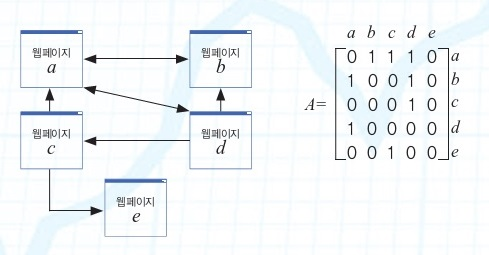

In [33]:
# step 1

Image("step1.jpg")

In [34]:
# 웹페이지(j)에서 웹페이지(i)의 링크를 걸었다면 "1", 걸지 않았다면 "0"을 element로 가지는 matrix A.

A = np.array([[0, 1, 0, 1, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 1], [1, 1, 1, 0, 0], [0, 0, 0, 0, 0]])
A.T

array([[0, 1, 1, 1, 0],
       [1, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0]])

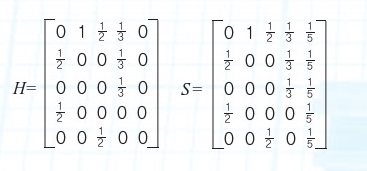

In [35]:
# step 2

Image("step2.jpg")

In [36]:
# Hyperlink matrix H, S

def HS(A):
    H = np.eye(len(A))
    for i in range(len(A)):
        if sum(A[i]) == 0:
            H[i] = 1 / len(A)
        else:
            H[i] = A[i] / sum(A[i])
    return H

In [37]:
S = HS(A)
S.T

array([[0.        , 1.        , 0.5       , 0.33333333, 0.2       ],
       [0.5       , 0.        , 0.        , 0.33333333, 0.2       ],
       [0.        , 0.        , 0.        , 0.33333333, 0.2       ],
       [0.5       , 0.        , 0.        , 0.        , 0.2       ],
       [0.        , 0.        , 0.5       , 0.        , 0.2       ]])

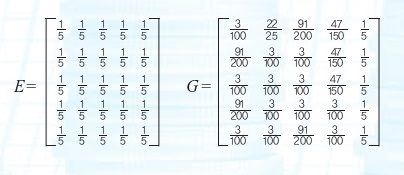

In [38]:
# step 3
# G = dS + (1 - d)E
# d(Damping Factor) = 0.85

Image("step3.jpg")

In [39]:
def EG(S, d=0.85):
    n = len(S)
    E = np.ones((n, n)) / n
    G = d * S + (1 - d) * E
    return G
G = EG(S.T)
G

array([[0.03      , 0.88      , 0.455     , 0.31333333, 0.2       ],
       [0.455     , 0.03      , 0.03      , 0.31333333, 0.2       ],
       [0.03      , 0.03      , 0.03      , 0.31333333, 0.2       ],
       [0.455     , 0.03      , 0.03      , 0.03      , 0.2       ],
       [0.03      , 0.03      , 0.455     , 0.03      , 0.2       ]])

In [40]:
# step 4 : eigenvalue, eigenvector 구하기

w, v = np.linalg.eig(G)
w.round(2)

array([ 1.  +0.j  ,  0.31+0.j  , -0.43+0.17j, -0.43-0.17j, -0.13+0.j  ])